In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/home/tom/anaconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [16]:
import sys
sys.path.append("/Users/tlee010/Desktop/github_repos/fastai/") # go to parent dir

from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor
from IPython.display import display

from sklearn import metrics

In [27]:
set_plot_sizes(12,100,100)

In [156]:
df_raw = pd.read_json('https://pomber.github.io/covid19/timeseries.json', orient='records')
df = pd.DataFrame()
df_raw.loc[:,(['Argentina', 'Spain'])]

,Argentina,Spain
0,"{'date': '2020-1-22', 'confirmed': 0, 'deaths'...","{'date': '2020-1-22', 'confirmed': 0, 'deaths'..."
1,"{'date': '2020-1-23', 'confirmed': 0, 'deaths'...","{'date': '2020-1-23', 'confirmed': 0, 'deaths'..."
2,"{'date': '2020-1-24', 'confirmed': 0, 'deaths'...","{'date': '2020-1-24', 'confirmed': 0, 'deaths'..."
3,"{'date': '2020-1-25', 'confirmed': 0, 'deaths'...","{'date': '2020-1-25', 'confirmed': 0, 'deaths'..."
4,"{'date': '2020-1-26', 'confirmed': 0, 'deaths'...","{'date': '2020-1-26', 'confirmed': 0, 'deaths'..."
...,...,...
64,"{'date': '2020-3-26', 'confirmed': 502, 'death...","{'date': '2020-3-26', 'confirmed': 57786, 'dea..."
65,"{'date': '2020-3-27', 'confirmed': 589, 'death...","{'date': '2020-3-27', 'confirmed': 65719, 'dea..."
66,"{'date': '2020-3-28', 'confirmed': 690, 'death...","{'date': '2020-3-28', 'confirmed': 73235, 'dea..."
67,"{'date': '2020-3-29', 'confirmed': 745, 'death...","{'date': '2020-3-29', 'confirmed': 80110, 'dea..."


In [157]:
for row in df_raw.loc[:, 'Argentina']:
    row['country'] = 'Argentina'

for row in df_raw.loc[:, 'Spain']:
    row['country'] = 'España'

#df = pd.DataFrame([row for row in df_raw.loc[:,'Argentina']   ], columns=columns)

Dates = pd.Series([row['date'] for row in df_raw.loc[:, 'Spain']], name='date', dtype='datetime64[ns]')
Deaths = pd.Series([row['deaths'] for row in df_raw.loc[:, 'Spain']], name='date', dtype='int32')
Confirmed = pd.Series([row['confirmed'] for row in df_raw.loc[:, 'Spain']], name='date', dtype='int32')
Recovered = pd.Series([row['recovered'] for row in df_raw.loc[:, 'Spain']], name='date', dtype='int32')

frame = {'date': Dates, 'deaths': Deaths, 'confirmed': Confirmed, 'recovered': Recovered}
df_spain = pd.DataFrame(frame)
df_spain['country'] = 'España'
df_spain

,date,deaths,confirmed,recovered,country
0,2020-01-22,0,0,0,España
1,2020-01-23,0,0,0,España
2,2020-01-24,0,0,0,España
3,2020-01-25,0,0,0,España
4,2020-01-26,0,0,0,España
...,...,...,...,...,...
64,2020-03-26,4365,57786,7015,España
65,2020-03-27,5138,65719,9357,España
66,2020-03-28,5982,73235,12285,España
67,2020-03-29,6803,80110,14709,España


In [158]:
Dates = pd.Series([row['date'] for row in df_raw.loc[:, 'Argentina']], name='date', dtype='datetime64[ns]')
Deaths = pd.Series([row['deaths'] for row in df_raw.loc[:, 'Argentina']], name='date', dtype='int32')
Confirmed = pd.Series([row['confirmed'] for row in df_raw.loc[:, 'Argentina']], name='date', dtype='int32')
Recovered = pd.Series([row['recovered'] for row in df_raw.loc[:, 'Argentina']], name='date', dtype='int32')

frame = {'date': Dates, 'deaths': Deaths, 'confirmed': Confirmed, 'recovered': Recovered}
df_arg = pd.DataFrame(frame)
df_arg['country'] = 'Argentina'
df_arg

,date,deaths,confirmed,recovered,country
0,2020-01-22,0,0,0,Argentina
1,2020-01-23,0,0,0,Argentina
2,2020-01-24,0,0,0,Argentina
3,2020-01-25,0,0,0,Argentina
4,2020-01-26,0,0,0,Argentina
...,...,...,...,...,...
64,2020-03-26,9,502,63,Argentina
65,2020-03-27,13,589,72,Argentina
66,2020-03-28,18,690,72,Argentina
67,2020-03-29,19,745,72,Argentina


In [159]:
df = df_arg.append(df_spain)

df.reset_index(inplace=True)

In [160]:
os.makedirs('tmp', exist_ok=True)
df.to_feather('tmp/data_covid19-raw')

In [16]:
df = pd.read_feather('tmp/data_covid19-raw')
df

,index,date,deaths,confirmed,recovered,country
0,0,2020-01-22,0,0,0,Argentina
1,1,2020-01-23,0,0,0,Argentina
2,2,2020-01-24,0,0,0,Argentina
3,3,2020-01-25,0,0,0,Argentina
4,4,2020-01-26,0,0,0,Argentina
...,...,...,...,...,...,...
131,63,2020-03-25,3647,49515,5367,España
132,64,2020-03-26,4365,57786,7015,España
133,65,2020-03-27,5138,65719,9357,España
134,66,2020-03-28,5982,73235,12285,España


In [251]:
df_arg['afectados'] = df_arg['confirmed'] + df_arg['deaths'] + df_arg['recovered']

df_arg['infect'] = df_arg['confirmed'] - df_arg['confirmed'].shift()

#df_arg[df_arg['confirmed'] > 0].plot(kind='bar', x='date', y='infect', figsize=(18, 6))

Analyzin through 22 days


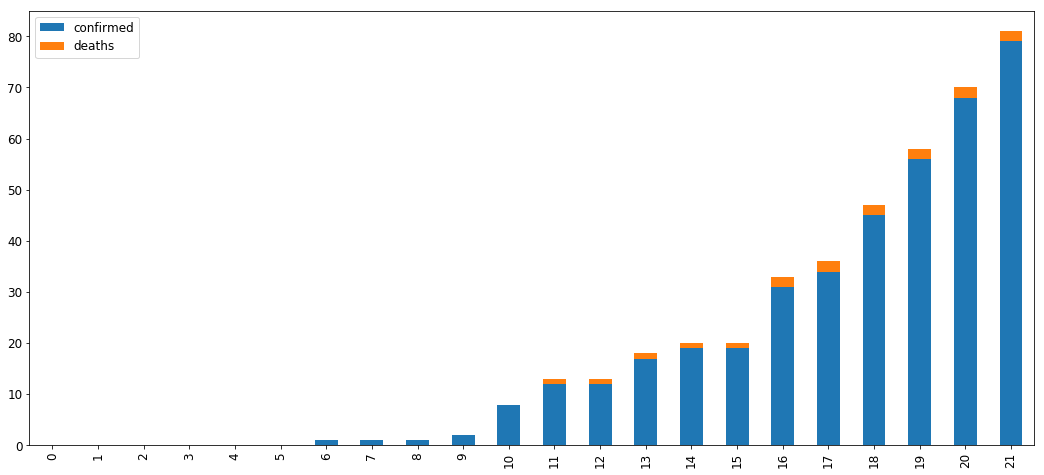

In [250]:
size = df_arg[df_arg['confirmed'] > 10].index.max() - df_arg[df_arg['confirmed'] > 10].index.min()
print(f'Analyzin through {size} days')

x = df_arg[df_spain['confirmed'] > 10][0:size]
x.reset_index(inplace=True)

x.plot(kind='bar', stacked=True , y=['confirmed', 'deaths'], figsize=(18, 8))

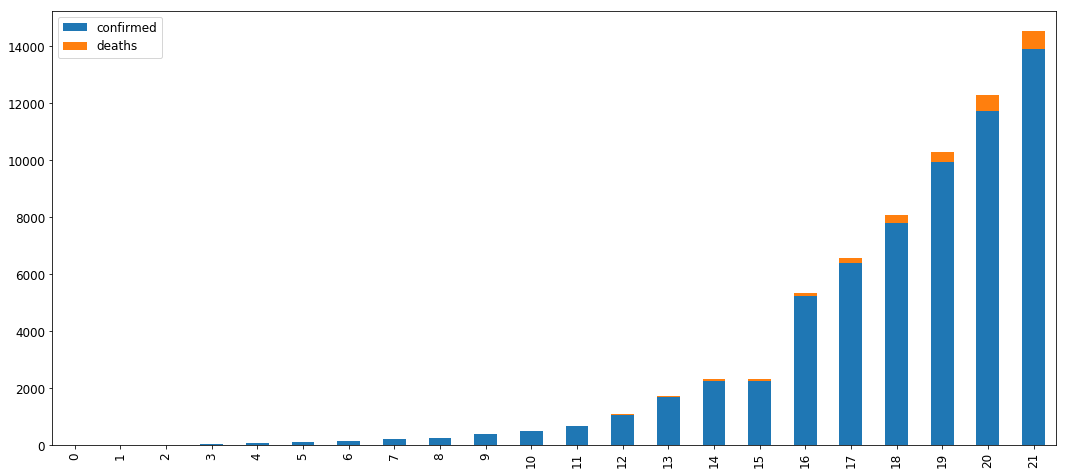

In [245]:
df_spain['afectados'] = df_spain['confirmed'] + df_spain['deaths'] + df_spain['recovered']

df_spain['infect'] = df_spain['confirmed'] - df_spain['confirmed'].shift()
x = df_spain[df_spain['confirmed'] > 10][0:size]
x.reset_index(inplace=True)
x.plot(kind='bar',stacked=True , y=['confirmed', 'deaths'], figsize=(18, 8))